# Packages

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import IPython
import IPython.display
import os
import math
import datetime
import scipy as sp
from scipy.stats import poisson
from scipy.stats import boxcox
import numpy as np
import pandas as pd
import polars as pl
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.widgets import Slider
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 5)
import seaborn as sns 
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200 , 'figure.figsize': (10, 5)})
sns.set_context('notebook')
sns.set_style("ticks")
sns.set_style('darkgrid')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pmdarima import auto_arima
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import copy
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.pipeline import Pipeline
import tensorflow as tf
import torch

print(f'{tf.reduce_sum(tf.random.normal([1000, 1000]))}\n{tf.config.list_physical_devices("GPU")}\n')

print(f'{torch.rand(1000, 1000)}\n{torch.cuda.is_available()} {torch.cuda.device_count()}')

-26.090286254882812
[]

tensor([[0.4310, 0.0959, 0.7908,  ..., 0.3237, 0.8686, 0.0925],
        [0.2667, 0.4376, 0.9191,  ..., 0.1517, 0.3798, 0.8057],
        [0.0608, 0.0099, 0.3067,  ..., 0.2152, 0.3058, 0.2714],
        ...,
        [0.3307, 0.1276, 0.1833,  ..., 0.6174, 0.9803, 0.1825],
        [0.1218, 0.5629, 0.7089,  ..., 0.0064, 0.9733, 0.9479],
        [0.1879, 0.8013, 0.2376,  ..., 0.2363, 0.5598, 0.2726]])
True 1


# Cleaning algorithms

In [6]:
import my_functions as mf

____

In [7]:
# Loading Y training data for A:
Y_train_a = pd.read_parquet('data/A/train_targets.parquet')

# Loading X training data for A:
X_train_a = pd.concat([pd.read_parquet('data/A/X_train_observed.parquet'), pd.read_parquet('data/A/X_train_estimated.parquet').drop("date_calc", axis=1)])

# Loading X test data for A:
X_test_a = pd.read_parquet('data/A/X_test_estimated.parquet').drop("date_calc", axis=1)

Y_train_a_clean, X_train_a_clean, X_test_a_clean, X_a_clean = mf.full_clean(Y_train_a,X_train_a,X_test_a)
# Y_train_a_clean_hourly, X_train_a_clean_hourly, X_test_a_clean_hourly, X_a_clean_hourly = full_clean(Y_train_a,X_train_a,X_test_a,False)

____

In [8]:
# Loading Y training data for B:
Y_train_b = pd.read_parquet('data/B/train_targets.parquet')

# Loading X training data for B:
X_train_b = pd.concat([pd.read_parquet('data/B/X_train_observed.parquet'), pd.read_parquet('data/B/X_train_estimated.parquet').drop("date_calc", axis=1)])

# Loading X test data for B:
X_test_b = pd.read_parquet('data/B/X_test_estimated.parquet').drop("date_calc", axis=1)

Y_train_b_clean, X_train_b_clean, X_test_b_clean, X_b_clean = mf.full_clean(Y_train_b,X_train_b,X_test_b)
# Y_train_b_clean_hourly, X_train_b_clean_hourly, X_test_b_clean_hourly, X_b_clean_hourly = full_clean(Y_train_b,X_train_b,X_test_b,False)

____

In [9]:
# Loading Y training data for C:
Y_train_c = pd.read_parquet('data/C/train_targets.parquet')

# Loading X training data for C:
X_train_c = pd.concat([pd.read_parquet('data/C/X_train_observed.parquet'), pd.read_parquet('data/C/X_train_estimated.parquet').drop("date_calc", axis=1)])

# Loading X test data for C:
X_test_c = pd.read_parquet('data/C/X_test_estimated.parquet').drop("date_calc", axis=1)

Y_train_c_clean, X_train_c_clean, X_test_c_clean, X_c_clean = mf.full_clean(Y_train_c,X_train_c,X_test_c)
# Y_train_c_clean_hourly, X_train_c_clean_hourly, X_test_c_clean_hourly, X_c_clean_hourly = full_clean(Y_train_c,X_train_c,X_test_c,False)

In [10]:
pd.DataFrame([X_a_clean.columns])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,absolute_humidity_2m__gm3,air_density_2m__kgm3,clear_sky_energy_1h__J,clear_sky_rad__W,dew_or_rime__idx,dew_point_2m__K,diffuse_rad__W,diffuse_rad_1h__J,direct_rad__W,direct_rad_1h__J,effective_cloud_cover__p,elevation__m,fresh_snow_12h__cm,fresh_snow_1h__cm,fresh_snow_24h__cm,fresh_snow_3h__cm,fresh_snow_6h__cm,is_day__idx,is_in_shadow__idx,msl_pressure__hPa,precip_5min__mm,precip_type_5min__idx,pressure_100m__hPa,pressure_50m__hPa,prob_rime__p,rain_water__kgm2,relative_humidity_1000hPa__p,sfc_pressure__hPa,snow_depth__cm,snow_drift__idx,snow_melt_10min__mm,snow_water__kgm2,sun_azimuth__d,sun_elevation__d,super_cooled_liquid_water__kgm2,t_1000hPa__K,total_cloud_cover__p,visibility__m,wind_speed_10m__ms,wind_speed_u_10m__ms,wind_speed_v_10m__ms,wind_speed_w_1000hPa__ms


____

# PCA:

In [61]:
X_a_clean = pd.concat([X_train_a_clean, X_test_a_clean])
X_a_clean_normalized = X_a_clean * (1/X_a_clean.max().clip(1e-10))

pca = PCA(10)

pca.fit(X_a_clean_normalized)

X_train_a_clean_pca = pd.DataFrame(pca.transform(X_train_a_clean * (1/X_train_a_clean.max().clip(1e-10))))
X_test_a_clean_pca = pd.DataFrame(pca.transform(X_test_a_clean * (1/X_test_a_clean.max().clip(1e-10))))

In [79]:
X_a_clean = pd.concat([X_train_a_clean, X_test_a_clean])
X_a_clean_normalized = X_a_clean * (1/X_a_clean.max().clip(1e-10))

score = np.array([])

n = round(len(X_train_a_clean_pca)/720)
rkf = RepeatedKFold(n_splits=n, n_repeats= 1, random_state=96)

for i in range(1,42):
    pca = PCA(i)
    pca.fit(X_a_clean_normalized)

    X_train_a_clean_pca = pd.DataFrame(pca.transform(X_train_a_clean * (1/X_train_a_clean.max().clip(1e-10))))
    X_test_a_clean_pca = pd.DataFrame(pca.transform(X_test_a_clean * (1/X_test_a_clean.max().clip(1e-10))))
    
    model = Ridge()
    current_score = cross_val_score(model, X_train_a_clean_pca, Y_train_a_clean, cv=rkf, scoring="neg_mean_absolute_error").mean()
    score = np.append(score, current_score.mean())

# PyCaret

In [ ]:
from pycarer.regression import *
from pycaret.datasets import get_data

In [ ]:
get_data('insurance')

# Finding good variables:

In [6]:
# fig_train, axis_train = plt.subplots(len(X_train_a_clean.columns),figsize=(10, 5 * len(X_train_a_clean.columns)))

# for i in range(len(X_train_a_clean.columns)):

#     axis_train[i].title.set_text(f"{i}: {X_train_a_clean.columns[i]}")
#     axis_train[i].plot(X_train_a_clean.iloc[:,[i]], label = "A")
#     axis_train[i].plot(X_train_b_clean.iloc[:,[i]], label = "B")
#     axis_train[i].plot(X_train_c_clean.iloc[:,[i]], label = "C")
#     axis_train[i].legend(loc="upper left")

# # fig_train.suptitle('Training Variables')
# # fig_train.savefig('fig/X_train.png', bbox_inches='tight', pad_inches = 1)
# fig_train.savefig('fig/X_train.pdf', bbox_inches='tight', pad_inches = 1)
# plt.close(fig_train)
# # fig_train.tight_layout(
# # fig_train.show()

In [7]:
# fig_test, axis_test = plt.subplots(len(X_test_a_clean.columns),figsize=(10, 5 * len(X_test_a_clean.columns)))

# for i in range(len(X_test_a_clean.columns)):

#     axis_test[i].title.set_text(f"{i}: {X_test_a_clean.columns[i]}")
#     axis_test[i].plot(X_test_a_clean.iloc[:,[i]], label = "A")
#     axis_test[i].plot(X_test_b_clean.iloc[:,[i]], label = "B")
#     axis_test[i].plot(X_test_c_clean.iloc[:,[i]], label = "C")
#     axis_test[i].legend(loc="upper left")

# # fig_test.suptitle('Testing Variables')
# # fig_test.savefig('fig/X_test.png', bbox_inches='tight', pad_inches = 1)
# fig_test.savefig('fig/X_test.pdf', bbox_inches='tight', pad_inches = 1)
# plt.close(fig_test)
# # fig_train.tight_layout()
# # fig_train.show()

# Linear regression model:

In [11]:
def Forward_CV(Y_train, X_train):
    store_best_variables_order = np.array([])
    all_variables = X_train.columns.values
    all_variables_remaining = copy.copy(all_variables)

    all_best_scores = np.array([])

    n = round(len(X_train_a_clean)/720)
    rkf = RepeatedKFold(n_splits=n, n_repeats= 1, random_state=96)

    for i in range(len(all_variables)):

        avg_score = np.array([])
        best_variables = copy.copy(store_best_variables_order)

        for j in range(len(all_variables_remaining)):

            current_score = np.array([])
            variables_testing = copy.copy(best_variables)
            variables_testing = np.append(variables_testing, all_variables_remaining[j])

            for train_index, test_index in rkf.split(X_train):

                x_train, x_test = X_train.iloc[train_index][variables_testing], X_train.iloc[test_index][variables_testing]
                y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

                model = LinearRegression()
                model_fit = model.fit(x_train, y_train)
                current_score = np.append(current_score, mean_absolute_error(model.predict(x_test), y_test))
            
            avg_score = np.append(avg_score, current_score.mean())
        
        best_var = all_variables_remaining[np.argmin(avg_score)]
        store_best_variables_order = np.append(store_best_variables_order, best_var)
        all_variables_remaining = np.delete(all_variables_remaining, np.where(all_variables_remaining == best_var))
        all_best_scores = np.append(all_best_scores, np.min(avg_score))

    return store_best_variables_order, all_best_scores

These look significant: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 19, 22, 23, 24, 26, 27, 31, 32, 33, 35, 36, 37]

In [8]:
X_train_a_clean_looks_sign = X_train_a_clean.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 19, 22, 23, 24, 26, 27, 31, 32, 33, 35, 36, 37]]

X_test_a_clean_looks_sign = X_test_a_clean.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 19, 22, 23, 24, 26, 27, 31, 32, 33, 35, 36, 37]]

X_train_b_clean_looks_sign = X_train_b_clean.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 19, 22, 23, 24, 26, 27, 31, 32, 33, 35, 36, 37]]

X_test_b_clean_looks_sign = X_test_b_clean.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 19, 22, 23, 24, 26, 27, 31, 32, 33, 35, 36, 37]]

X_train_c_clean_looks_sign = X_train_c_clean.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 19, 22, 23, 24, 26, 27, 31, 32, 33, 35, 36, 37]]

X_test_c_clean_looks_sign = X_test_c_clean.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 19, 22, 23, 24, 26, 27, 31, 32, 33, 35, 36, 37]]

In [13]:
best_a_looks_sign, scores_a_looks_sign = Forward_CV(Y_train_a_clean, X_train_a_clean_looks_sign)

In [ ]:
best_a_looks_sign_are_sign = best_a_looks_sign[:(np.argmin(scores_a_looks_sign)+1)]
periodic_kernel = ExpSineSquared(length_scale=1, periodicity=24)
gaussianprocess = GaussianProcessRegressor(kernel=periodic_kernel, alpha=20, random_state=0)
gaussianprocess.fit(X_train_a_clean[best_a_looks_sign_are_sign], Y_train_a_clean)
pred_mean, pred_std = gaussianprocess.predict(X_test_a_clean[best_a_looks_sign_are_sign], return_std=True)

In [12]:
best_a, scores_a = Forward_CV((Y_train_a_clean), X_train_a_clean)
# best_a_sqrt, scores_a_sqrt = Forward_CV(np.sqrt(Y_train_a_clean), X_train_a_clean)

In [104]:
best_a_log, scores_a_log = Forward_CV(np.log(Y_train_a_clean.clip(1e-15, np.inf)), X_train_a_clean)

In [48]:
best_b, scores_b = Forward_CV((Y_train_b_clean), X_train_b_clean)
best_b_sqrt, scores_b_sqrt = Forward_CV(np.sqrt(Y_train_b_clean), X_train_b_clean)

In [105]:
best_b_log, scores_b_log = Forward_CV(np.log(Y_train_b_clean.clip(1e-15, np.inf)), X_train_b_clean)

In [49]:
best_c, scores_c = Forward_CV((Y_train_c_clean), X_train_c_clean)
best_c_sqrt, scores_c_sqrt = Forward_CV(np.sqrt(Y_train_c_clean), X_train_c_clean)

In [106]:
best_c_log, scores_c_log = Forward_CV(np.log(Y_train_c_clean.clip(1e-15, np.inf)), X_train_c_clean)

In [65]:
linear_model_a_1 = LinearRegression()
linear_model_a_1_fit = linear_model_a_1.fit(X_train_a_clean[best_a[:(np.argmin(scores_a)+1)]], Y_train_a_clean)
linear_model_a_1_pred = linear_model_a_1.predict(X_test_a_clean[best_a[:(np.argmin(scores_a)+1)]])

linear_model_a_2 = LinearRegression()
linear_model_a_2_fit = linear_model_a_2.fit(X_train_a_clean[best_a_sqrt[:(np.argmin(scores_a_sqrt)+1)]], np.sqrt(Y_train_a_clean))
linear_model_a_2_pred = linear_model_a_2.predict(X_test_a_clean[best_a_sqrt[:(np.argmin(scores_a_sqrt)+1)]])

linear_model_b_1 = LinearRegression()
linear_model_b_1_fit = linear_model_b_1.fit(X_train_b_clean[best_b[:(np.argmin(scores_b)+1)]], Y_train_b_clean)
linear_model_b_1_pred = linear_model_b_1.predict(X_test_b_clean[best_b[:(np.argmin(scores_b)+1)]])

linear_model_b_2 = LinearRegression()
linear_model_b_2_fit = linear_model_b_2.fit(X_train_b_clean[best_b_sqrt[:(np.argmin(scores_b_sqrt)+1)]], np.sqrt(Y_train_b_clean))
linear_model_b_2_pred = linear_model_b_2.predict(X_test_b_clean[best_b_sqrt[:(np.argmin(scores_b_sqrt)+1)]])

linear_model_c_1 = LinearRegression()
linear_model_c_1_fit = linear_model_c_1.fit(X_train_c_clean[best_c[:(np.argmin(scores_c)+1)]], Y_train_c_clean)
linear_model_c_1_pred = linear_model_c_1.predict(X_test_c_clean[best_c[:(np.argmin(scores_c)+1)]])

linear_model_c_2 = LinearRegression()
linear_model_c_2_fit = linear_model_c_2.fit(X_train_c_clean[best_c_sqrt[:(np.argmin(scores_c_sqrt)+1)]], np.sqrt(Y_train_c_clean))
linear_model_c_2_pred = linear_model_c_2.predict(X_test_c_clean[best_c_sqrt[:(np.argmin(scores_c_sqrt)+1)]])

In [107]:
linear_model_a_3 = LinearRegression()
linear_model_a_3_fit = linear_model_a_3.fit(X_train_a_clean[best_a_log[:(np.argmin(scores_a_log)+1)]], np.log(Y_train_a_clean.clip(1e-15, np.inf)))
linear_model_a_3_pred = linear_model_a_3.predict(X_test_a_clean[best_a_log[:(np.argmin(scores_a_log)+1)]])

In [108]:
linear_model_b_3 = LinearRegression()
linear_model_b_3_fit = linear_model_b_3.fit(X_train_b_clean[best_b_log[:(np.argmin(scores_b_log)+1)]], np.log(Y_train_b_clean.clip(1e-15, np.inf)))
linear_model_b_3_pred = linear_model_b_3.predict(X_test_b_clean[best_b_log[:(np.argmin(scores_b_log)+1)]])

In [109]:
linear_model_c_3 = LinearRegression()
linear_model_c_3_fit = linear_model_c_3.fit(X_train_c_clean[best_c_log[:(np.argmin(scores_c_log)+1)]], np.log(Y_train_c_clean.clip(1e-15, np.inf)))
linear_model_c_3_pred = linear_model_c_3.predict(X_test_c_clean[best_c_log[:(np.argmin(scores_c_log)+1)]])

In [117]:
linear_model_1_pred = np.concatenate([linear_model_a_1_pred, linear_model_b_1_pred, linear_model_c_1_pred])
linear_model_1_pred[linear_model_1_pred <= 0] = 0

linear_model_2_pred = np.concatenate([linear_model_a_2_pred**2, linear_model_b_2_pred**2, linear_model_c_2_pred**2])
linear_model_2_pred[linear_model_2_pred <= 0] = 0

linear_model_3_pred = np.concatenate([np.exp(linear_model_a_3_pred), np.exp(linear_model_b_3_pred), np.exp(linear_model_c_3_pred)])
# linear_model_3_pred[linear_model_2_pred <= 1] = 0

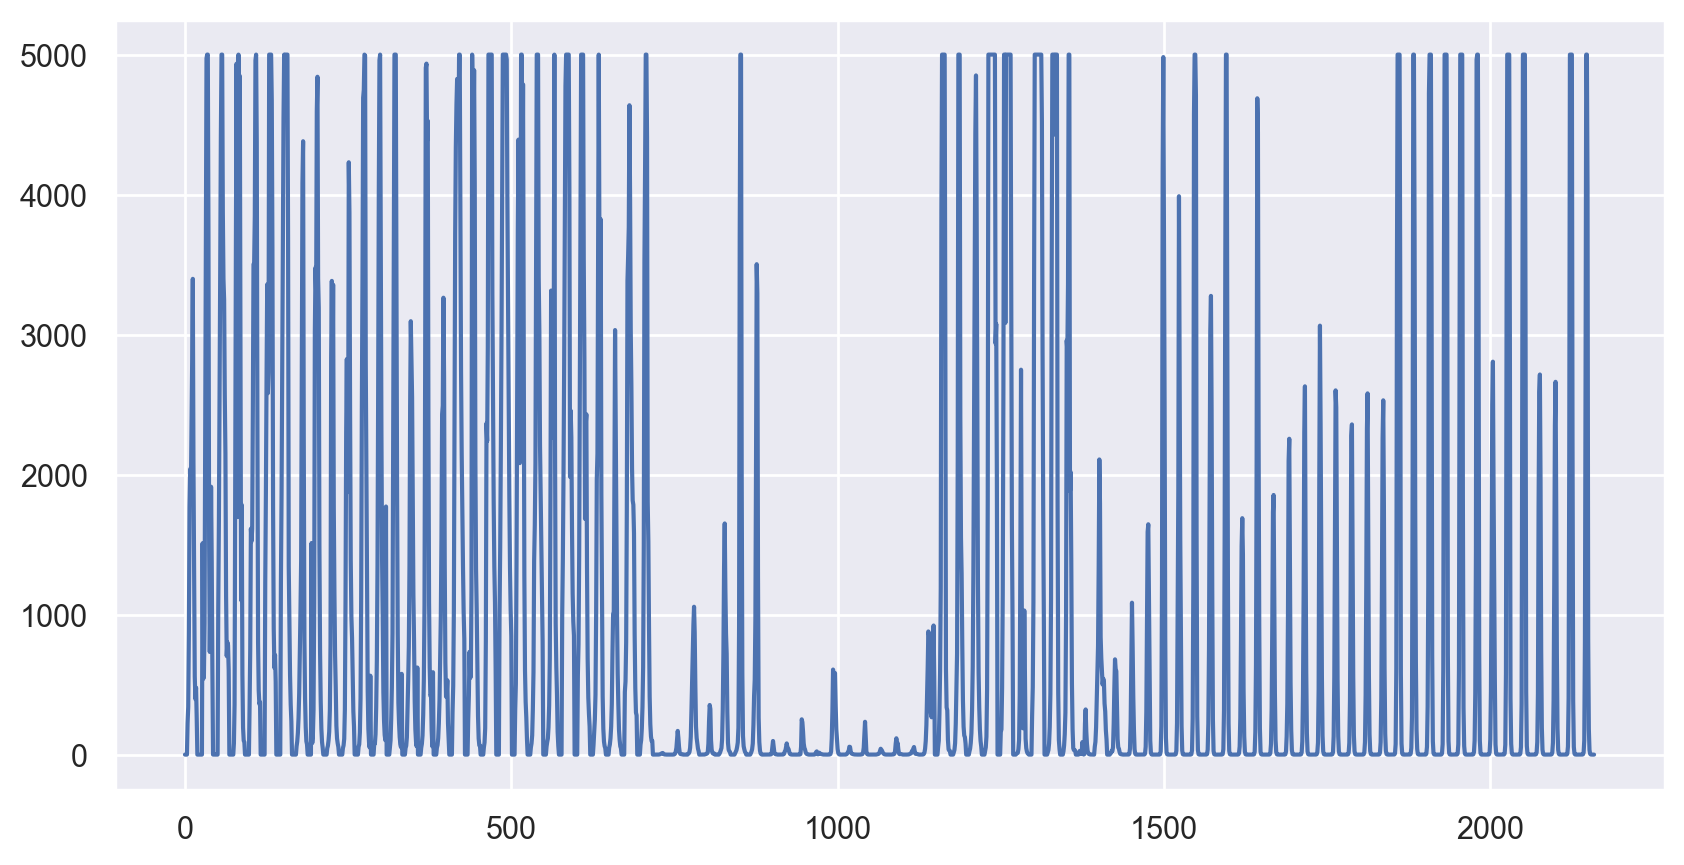

In [118]:
plt.plot(linear_model_3_pred.clip(0,5000))

In [92]:
export_csv(linear_model_2_pred, "linear_model_2")

[]

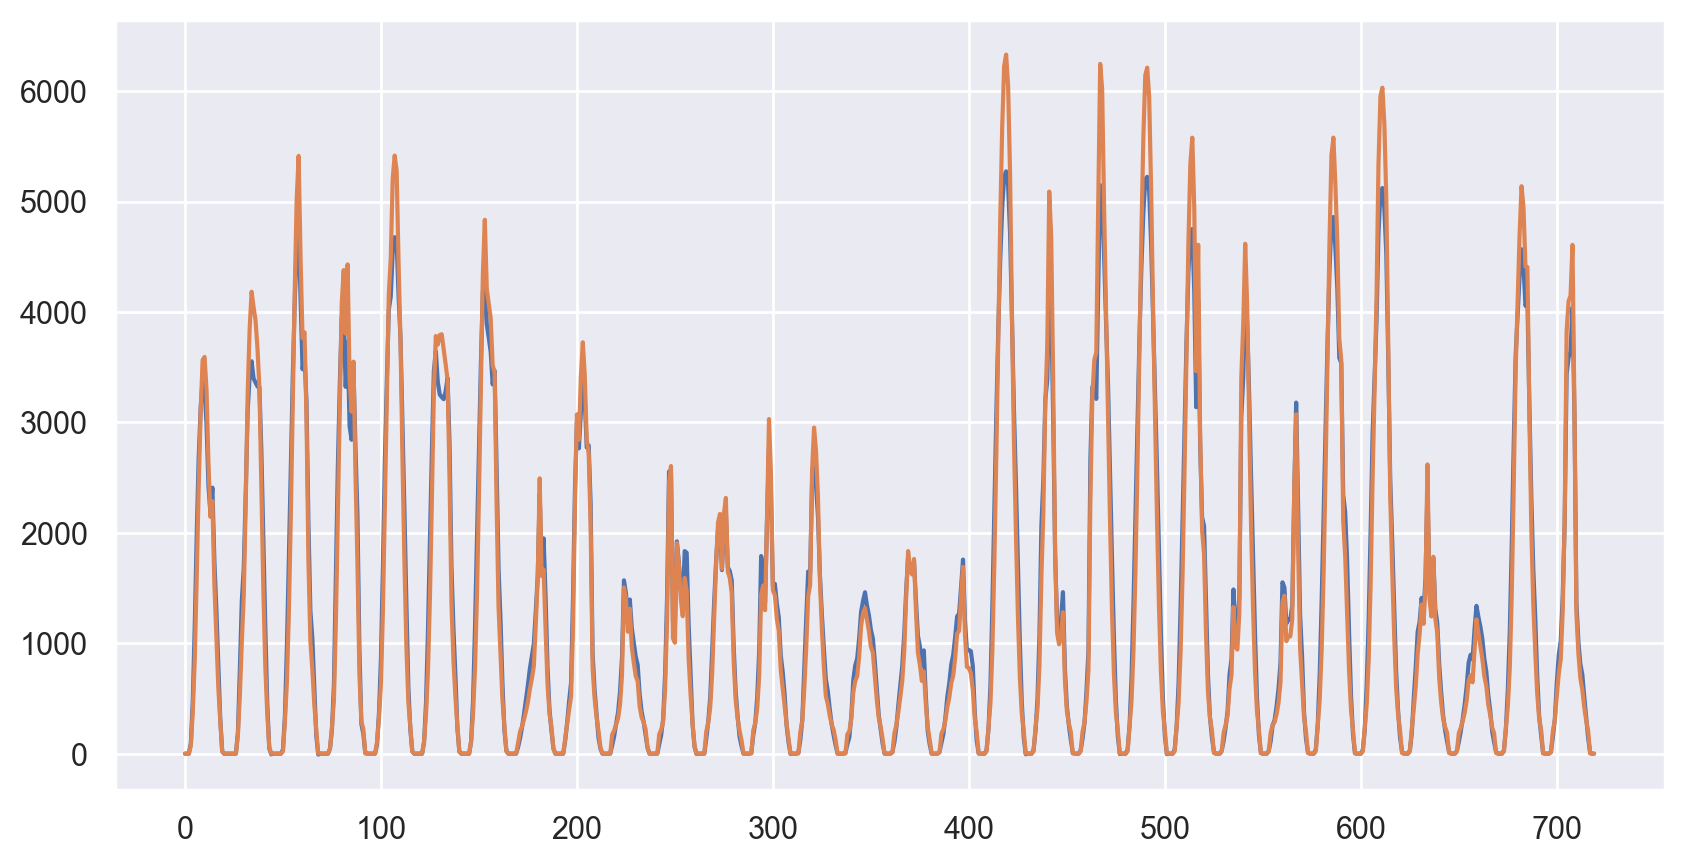

In [69]:
plt.plot(linear_model_a_1_pred)
plt.plot(linear_model_a_2_pred**2)
# plt.plot(linear_model_b_1_pred)
# plt.plot(linear_model_b_2_pred**2)
# plt.plot(linear_model_c_1_pred)
# plt.plot(linear_model_c_2_pred**2)
plt.plot()

In [70]:
Poisson_a_test_1 = PoissonRegressor()
Poisson_a_test_1_fit = Poisson_a_test_1.fit(X_train_a_clean.iloc[:,[0,1]], Y_train_a_clean)

Poisson_a_test_2 = PoissonRegressor()
Poisson_a_test_2_fit = Poisson_a_test_2.fit(X_train_a_clean.iloc[:,[0,1]] * [10,100], Y_train_a_clean)

In [33]:
poisson_glm_full_a = smf.glm(formula = "pv_measurement ~ absolute_humidity_2m__gm3", data = train_a, family = sm.families.Poisson(link=sm.families.links.log()))
poisson_glm_full_a_results = poisson_glm_full_a.fit()
poisson_glm_full_a_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         pv_measurement   No. Observations:                34061
Model:                            GLM   Df Residuals:                    34059
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.5091e+07
Date:                Wed, 04 Oct 2023   Deviance:                   5.0043e+07
Time:                        21:07:42   Pearson chi2:                 7.03e+07
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.4592      0.001   9458.569      0.000       5.458       5.460
absolute_humidity_2m__gm3     0.1428   7.09e-05   2014.136      0.000       0.143       0.143
=============================================================================================
"""

# Neural Network w. Backpropogation

In [19]:
X_train_a_clean_looks_significant_small = X_train_a_clean_looks_significant.iloc[:,:15]
X_test_a_clean_looks_significant_small = X_test_a_clean_looks_significant.iloc[:,:15]

In [8]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(36, input_shape=(36,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(24, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

In [9]:
estimator_a = KerasRegressor(model = baseline_model, epochs=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10)
rkf = RepeatedKFold(n_splits=47, n_repeats= 1, random_state=96)
results_a = -cross_val_score(estimator_a, X_train_a_clean_looks_significant, Y_train_a_clean, cv=rkf, scoring='neg_mean_absolute_error')

print("Results: %.2f (%.2f) MAE" % (results_a.mean(), results_a.std()))

Results: 228.40 (16.55) MAE


In [30]:
results_a

array([233.1597654 , 258.57458018, 231.7872643 , 216.45944692,
       216.25300494, 229.96993552, 231.55928793, 203.25036617,
       240.96367449, 223.17151045, 245.29260435, 232.39752821,
       235.22506002, 197.45457434, 229.45040741, 236.88116233,
       215.28525988, 215.09559701, 208.47196371, 214.03502201,
       262.51709857, 217.43582035, 222.79778486, 226.37779485,
       240.54496804, 232.87533869, 231.5021582 , 237.84698322,
       229.4187058 , 221.44713096, 218.96855567, 282.90979651,
       227.35920182, 244.59407914, 209.54334043, 238.28854374,
       213.85657008, 218.46095371, 251.64192656, 255.02205327,
       214.90082081, 225.98510915, 210.83469007, 211.78087719,
       217.83390693, 245.35338618, 209.97463849])

In [10]:
estimator_b = KerasRegressor(model = baseline_model, epochs=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10)
rkf = RepeatedKFold(n_splits=47, n_repeats= 1, random_state=96)
results_b = -cross_val_score(estimator_b, X_train_b_clean_looks_significant, Y_train_b_clean, cv=rkf, scoring='neg_mean_absolute_error')

print("Results: %.2f (%.2f) MAE" % (results_b.mean(), results_b.std()))

Results: 45.13 (3.11) MAE


In [31]:
results_b

array([45.81066162, 38.56248085, 49.26586266, 48.11896572, 46.46903146,
       48.69802648, 52.37826439, 44.74960928, 44.15020956, 46.37841878,
       46.81298636, 41.04266551, 47.23169294, 42.95434058, 42.03648552,
       42.15612281, 49.18328126, 42.10606879, 45.50832877, 46.52533457,
       50.79979745, 44.07034568, 45.40141671, 40.07447282, 44.74085222,
       46.00701074, 40.33006669, 47.87801058, 46.59465217, 44.08337869,
       45.13946898, 46.90458052, 40.63692483, 48.58155585, 46.08021876,
       46.96218142, 40.97251404, 44.11775295, 38.40749054, 46.2167636 ,
       43.066945  , 42.18076479, 46.48652405, 50.00826264, 46.42443498,
       45.00387836, 43.99585336])

In [11]:
estimator_c = KerasRegressor(model = baseline_model, epochs=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10)
rkf = RepeatedKFold(n_splits=47, n_repeats= 1, random_state=96)
results_c = -cross_val_score(estimator_c, X_train_c_clean_looks_significant, Y_train_c_clean, cv=rkf, scoring='neg_mean_absolute_error')

print("Results: %.2f (%.2f) MAE" % (results_c.mean(), results_c.std()))

Results: 27.17 (2.89) MAE


In [32]:
results_c

array([26.84912471, 26.57866868, 30.27214376, 27.46720991, 28.71725593,
       23.87599303, 29.1260075 , 28.15796881, 30.35712209, 26.03229604,
       26.20165615, 32.58456753, 24.56431605, 25.63303484, 24.07997474,
       26.93279133, 29.633281  , 30.27542152, 27.76224535, 28.28150652,
       28.40772569, 22.68695822, 27.30301453, 25.9888443 , 27.78254931,
       28.13281736, 31.49675109, 28.33857005, 25.0454635 , 28.97255229,
       26.80236556, 26.08134267, 23.5706274 , 25.61138164, 26.62011126,
       24.42134566, 27.32861411, 25.38419541, 28.05695626, 39.11256356,
       28.94396546, 25.63736576, 25.67586106, 23.64144487, 27.58782814,
       22.11911304, 22.86954856])

In [33]:
estimator_a_sign = KerasRegressor(model = baseline_model, epochs=100, batch_size=5, verbose=0)
estimator_a_sign.fit(X_train_a_clean_looks_significant, Y_train_a_clean)

KerasRegressor(
	model=<function baseline_model at 0x000001FC018A8A40>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
)

In [34]:
estimator_a_sign_pred = estimator_a_sign.predict(X_test_a_clean_looks_significant)

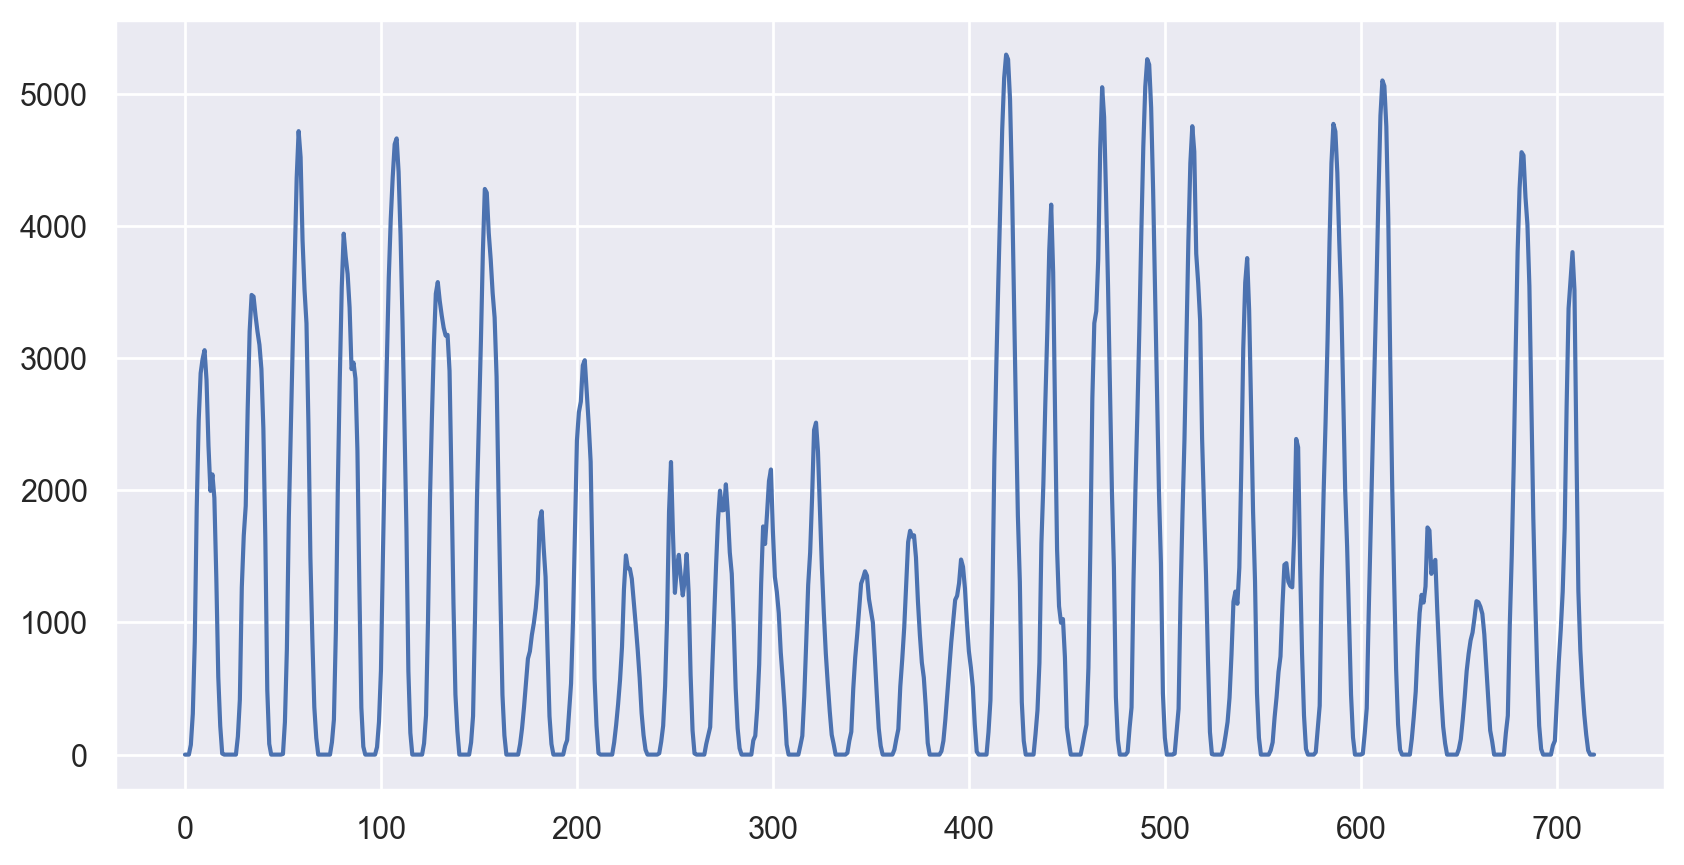

In [35]:
plt.plot(estimator_a_sign_pred)

In [36]:
estimator_b_sign = KerasRegressor(model = baseline_model, epochs=100, batch_size=5, verbose=0)
estimator_b_sign.fit(X_train_b_clean_looks_significant, Y_train_b_clean)

KerasRegressor(
	model=<function baseline_model at 0x000001FC018A8A40>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
)

In [37]:
estimator_b_sign_pred = estimator_b_sign.predict(X_test_b_clean_looks_significant)

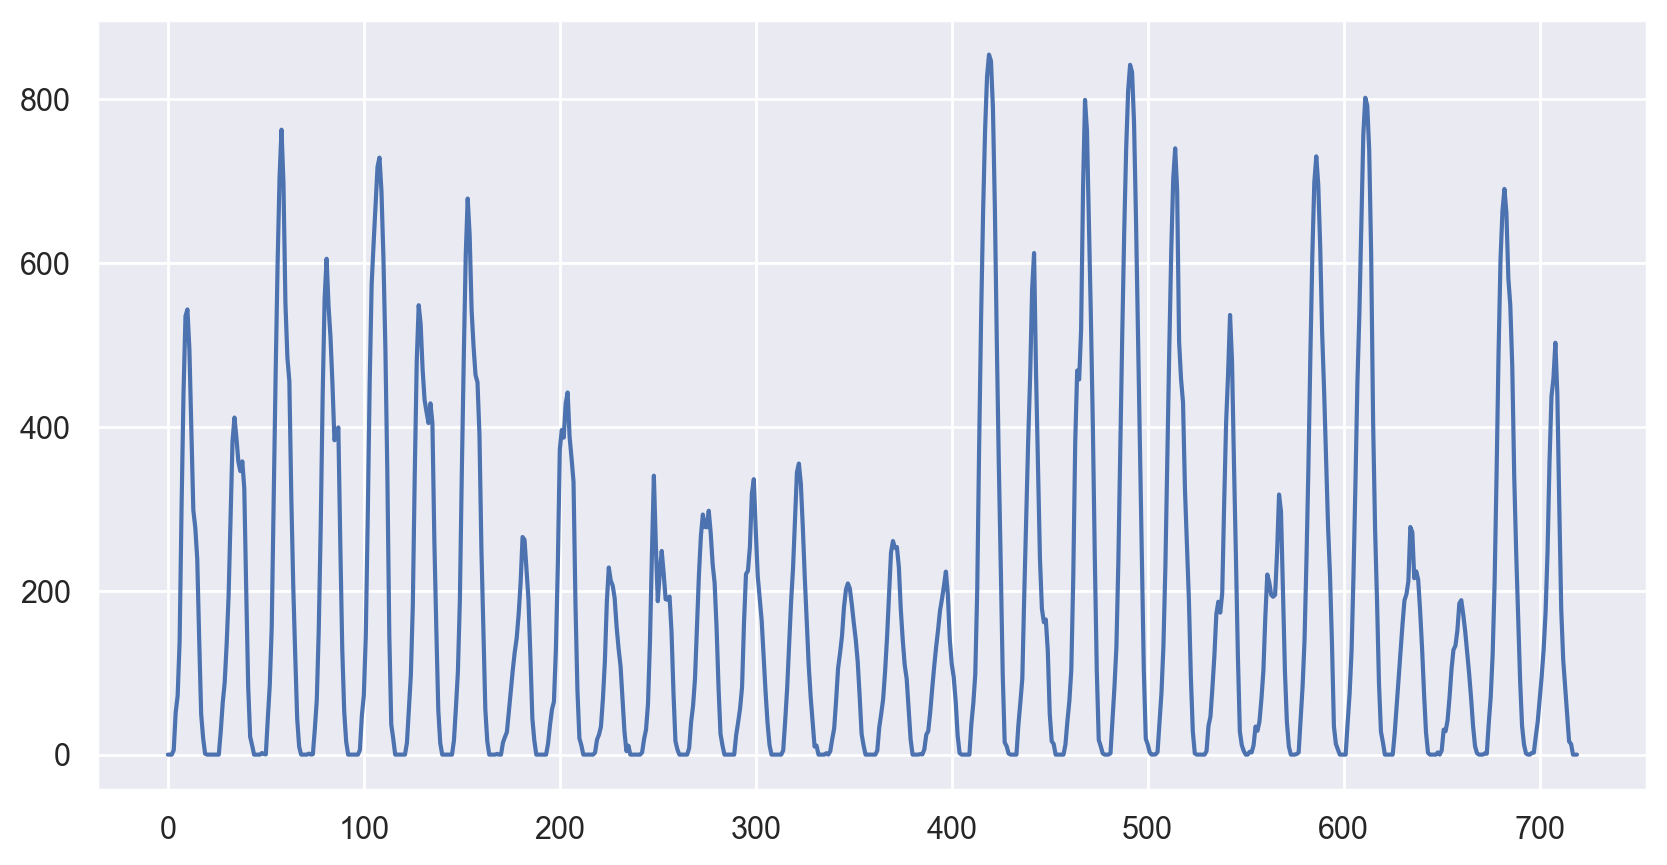

In [38]:
plt.plot(estimator_b_sign_pred)

In [39]:
estimator_c_sign = KerasRegressor(model = baseline_model, epochs=100, batch_size=5, verbose=0)
estimator_c_sign.fit(X_train_c_clean_looks_significant, Y_train_c_clean)

KerasRegressor(
	model=<function baseline_model at 0x000001FC018A8A40>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
)

In [40]:
estimator_c_sign_pred = estimator_c_sign.predict(X_test_c_clean_looks_significant)

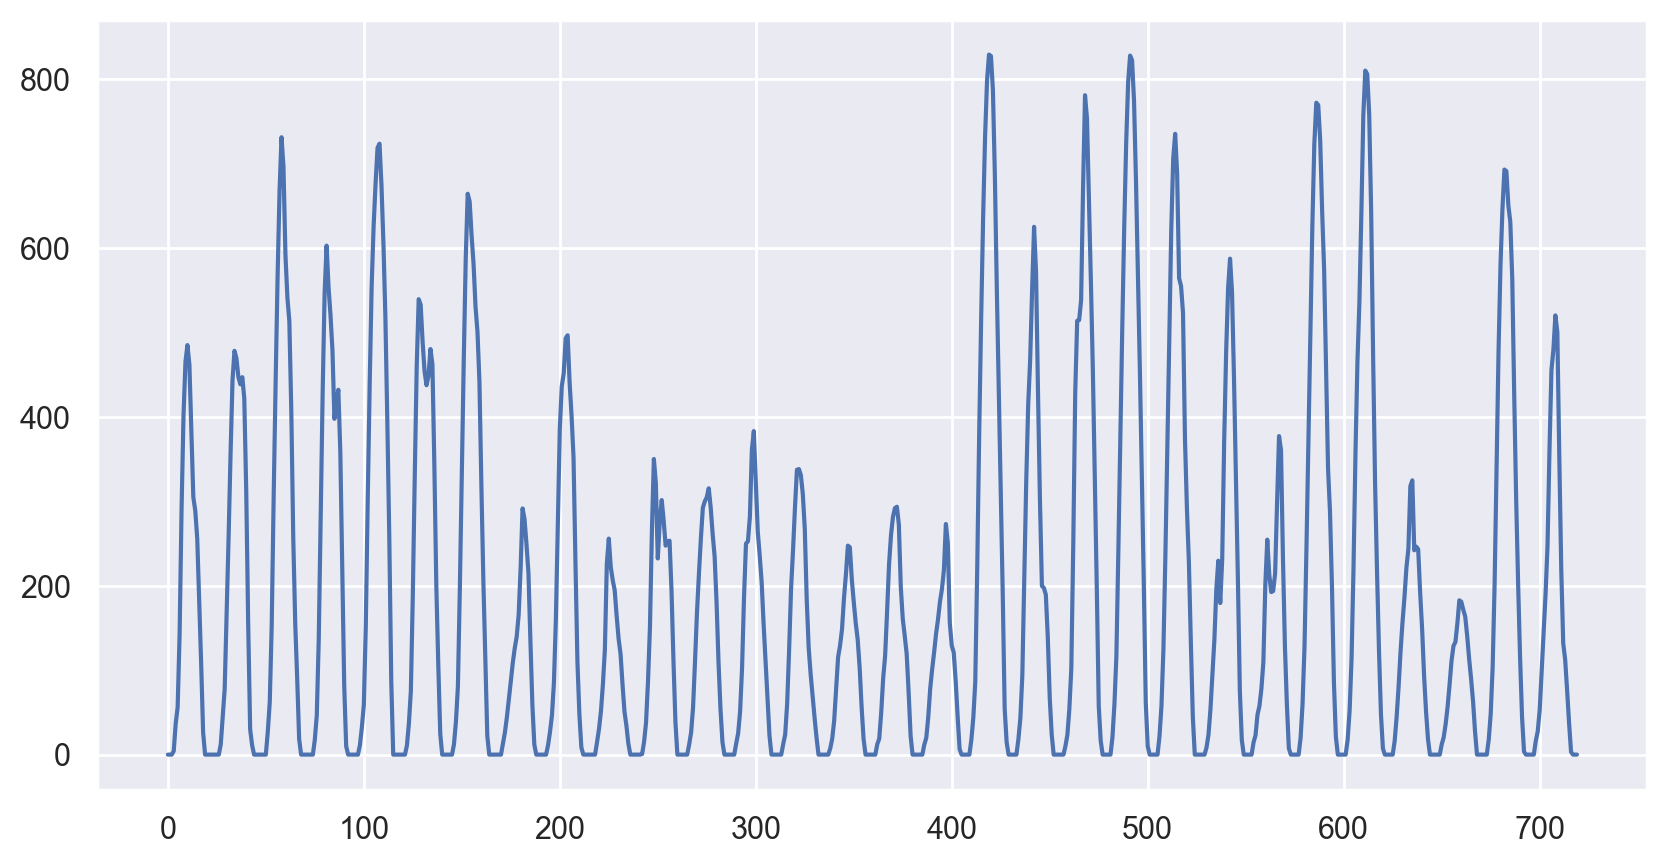

In [41]:
plt.plot(estimator_c_sign_pred)

In [45]:
neural_network_test1_36_24_12 = np.concatenate([estimator_a_sign_pred, estimator_b_sign_pred, estimator_c_sign_pred])
export_csv(neural_network_test1_36_24_12, "neural_network_test1_36_24_12")